In [124]:
import numpy as np
import pandas as pd
import pickle


# plotting libraries

import seaborn as sns
import matplotlib.pyplot as plt

# sklearn libraries

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import os, warnings

# Filter warnings

warnings.filterwarnings('ignore') #filter warnings

# Show plots inline

%matplotlib inline


In [125]:
df = pd.read_csv('IDS2018.csv')

In [126]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
# df.replace('Benign',0,inplace=True)
# df.replace('Bot',1,inplace=True)

In [127]:
# df.drop('Forward Packets', axis=1, inplace=True)
# df.drop('Forward Bytes', axis=1, inplace=True)
# df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Timestamp', axis=1, inplace=True)

In [128]:
print(df.shape)

(1044525, 79)


In [129]:
df.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,...,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06,1.044525e+06
mean,8.266766e+03,8.057796e+00,1.155885e+07,5.902530e+00,7.010040e+00,3.935511e+02,5.291713e+03,2.111953e+02,8.273807e+00,5.479855e+01,...,2.052119e+00,1.744416e+01,1.234346e+05,6.154744e+04,1.912618e+05,8.337649e+04,4.799736e+06,1.068351e+05,4.882636e+06,4.695151e+06
std,1.496231e+04,4.439372e+00,3.017092e+07,8.920527e+01,2.133700e+02,2.163833e+03,3.094749e+05,2.671786e+02,2.098046e+01,5.765815e+01,...,1.395102e+01,5.187126e+00,2.087119e+06,1.264132e+06,2.766778e+06,1.763232e+06,1.744425e+07,1.465423e+06,1.759949e+07,1.736415e+07
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+01,6.000000e+00,5.190000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.389000e+03,6.000000e+00,1.127400e+04,3.000000e+00,1.000000e+00,6.400000e+01,1.290000e+02,4.600000e+01,0.000000e+00,4.000000e+01,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.080000e+03,6.000000e+00,2.221014e+06,7.000000e+00,5.000000e+00,3.690000e+02,5.820000e+02,3.260000e+02,0.000000e+00,1.086667e+02,...,3.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553400e+04,1.700000e+01,1.200000e+08,4.315900e+04,6.924100e+04,1.100627e+06,1.010000e+08,1.711000e+03,1.460000e+03,1.460000e+03,...,9.262000e+03,4.400000e+01,1.110000e+08,7.490000e+07,1.110000e+08,1.110000e+08,1.200000e+08,7.590000e+07,1.200000e+08,1.200000e+08


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044525 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1044525 non-null  int64  
 1   Protocol           1044525 non-null  int64  
 2   Flow Duration      1044525 non-null  int64  
 3   Tot Fwd Pkts       1044525 non-null  int64  
 4   Tot Bwd Pkts       1044525 non-null  int64  
 5   TotLen Fwd Pkts    1044525 non-null  int64  
 6   TotLen Bwd Pkts    1044525 non-null  float64
 7   Fwd Pkt Len Max    1044525 non-null  int64  
 8   Fwd Pkt Len Min    1044525 non-null  int64  
 9   Fwd Pkt Len Mean   1044525 non-null  float64
 10  Fwd Pkt Len Std    1044525 non-null  float64
 11  Bwd Pkt Len Max    1044525 non-null  int64  
 12  Bwd Pkt Len Min    1044525 non-null  int64  
 13  Bwd Pkt Len Mean   1044525 non-null  float64
 14  Bwd Pkt Len Std    1044525 non-null  float64
 15  Flow Byts/s        1044525 non-n

In [131]:
df['Label'] = df['Label'].astype('category')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044525 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   Dst Port           1044525 non-null  int64   
 1   Protocol           1044525 non-null  int64   
 2   Flow Duration      1044525 non-null  int64   
 3   Tot Fwd Pkts       1044525 non-null  int64   
 4   Tot Bwd Pkts       1044525 non-null  int64   
 5   TotLen Fwd Pkts    1044525 non-null  int64   
 6   TotLen Bwd Pkts    1044525 non-null  float64 
 7   Fwd Pkt Len Max    1044525 non-null  int64   
 8   Fwd Pkt Len Min    1044525 non-null  int64   
 9   Fwd Pkt Len Mean   1044525 non-null  float64 
 10  Fwd Pkt Len Std    1044525 non-null  float64 
 11  Bwd Pkt Len Max    1044525 non-null  int64   
 12  Bwd Pkt Len Min    1044525 non-null  int64   
 13  Bwd Pkt Len Mean   1044525 non-null  float64 
 14  Bwd Pkt Len Std    1044525 non-null  float64 
 15  Flow Byts/s    

In [133]:
df['Label'].cat.categories

Index(['Benign', 'Bot'], dtype='object')

In [134]:
df['Label'].cat.codes.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [135]:
print('Features:',df.columns[:-1].values)

Features: ['Dst Port' 'Protocol' 'Flow Duration' 'Tot Fwd Pkts' 'Tot Bwd Pkts'
 'TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max' 'Fwd Pkt Len Min'
 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max' 'Bwd Pkt Len Min'
 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow Byts/s' 'Flow Pkts/s'
 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max' 'Flow IAT Min'
 'Fwd IAT Tot' 'Fwd IAT Mean' 'Fwd IAT Std' 'Fwd IAT Max' 'Fwd IAT Min'
 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max' 'Bwd IAT Min'
 'Fwd PSH Flags' 'Bwd PSH Flags' 'Fwd URG Flags' 'Bwd URG Flags'
 'Fwd Header Len' 'Bwd Header Len' 'Fwd Pkts/s' 'Bwd Pkts/s' 'Pkt Len Min'
 'Pkt Len Max' 'Pkt Len Mean' 'Pkt Len Std' 'Pkt Len Var' 'FIN Flag Cnt'
 'SYN Flag Cnt' 'RST Flag Cnt' 'PSH Flag Cnt' 'ACK Flag Cnt'
 'URG Flag Cnt' 'CWE Flag Count' 'ECE Flag Cnt' 'Down/Up Ratio'
 'Pkt Size Avg' 'Fwd Seg Size Avg' 'Bwd Seg Size Avg' 'Fwd Byts/b Avg'
 'Fwd Pkts/b Avg' 'Fwd Blk Rate Avg' 'Bwd Byts/b Avg' 'Bwd Pkts/b Avg'
 'Bwd Blk Rate Avg' 'S

In [136]:
print ('Value counts:')
df['Label'].value_counts()

Value counts:


Benign    758334
Bot       286191
Name: Label, dtype: int64

In [137]:
X = df.drop('Label',axis=1)
y = df['Label']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=101) # previous set to 101

In [139]:
model = LogisticRegression()

In [140]:
model.fit(X_train,y_train)

LogisticRegression()

In [141]:
idx = 0 #random number
single_x_test = [df.iloc[idx].drop('Label').tolist()]
single_y_test = df.iloc[idx]['Label']

In [142]:
single_prediction = model.predict(single_x_test)
print('For this sample, our model predicted %s and it was actually %s' % (single_prediction[0], single_y_test))

For this sample, our model predicted Benign and it was actually Benign


In [143]:
predictions = model.predict(X_test)

In [144]:
resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.head()

,true,predicted
842399,Benign,Benign
494171,Benign,Benign
337029,Bot,Benign
603087,Benign,Benign
880490,Benign,Benign


In [145]:
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 88.94%


In [146]:
print(pickle.format_version)

4.0


In [147]:
pickle.dump(model,open('LogisticRegression','wb'))

In [148]:
cm = confusion_matrix(predictions,y_test, labels=y.cat.categories)
print(cm)

[[184247  23515]
 [  5377  47993]]


In [149]:
cmDF = pd.DataFrame()

for i, row in enumerate(y.cat.categories):
    temp = {}
    for j, col in enumerate(y.cat.categories): 
        temp[col]=cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))

print(cmDF)

        Benign    Bot
Benign  184247  23515
Bot       5377  47993


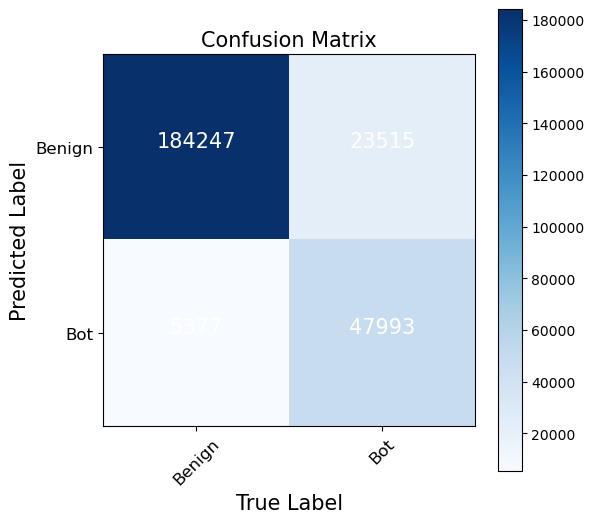

In [150]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45, fontsize=12)
plt.yticks(tick_marks, y.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)